In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def svm_pegasos(x_train,y_train,num_iterations=15,regularization_param=0.8):
    y_new=np.where(y_train <= 0,-1,1)
    num_samples=X_train.shape[0]
    num_dimensions=X_train.shape[1]   
    w=np.zeros(num_dimensions)    
    b=0
    for i in range(num_iterations):
        eta=1/(regularization_param*(i+1))
        j=np.random.choice(num_samples,1)[0]
        x,y=x_train[j],y_new[j]
        if(y*w.dot(x)<1):
            w=(1-eta*regularization_param)*w+eta*y*x
        else:
            w=(1-eta*regularization_param)*w    
    return w

In [3]:
def predict(X_test,w):
    return np.sign(np.dot(X_test,w))

In [16]:
from sklearn import datasets
X_train, y_train =  datasets.make_blobs(n_samples=5000, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y_train = np.where(y_train == 0, -1, 1)
X_test,y_test=datasets.make_blobs(n_samples=2000, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y_test = np.where(y_test == 0, -1, 1)

In [17]:
w=svm_pegasos(X_train,y_train,num_iterations=20*X_train.shape[0],regularization_param=0.01)
print(w)

[0.60425715 0.17087776]


In [18]:
result=predict(X_test,w)
acc=0
for i in range(len(X_test)):
    if(result[i]==y_test[i]):
        acc+=1
print(acc/len(X_test))

0.9995


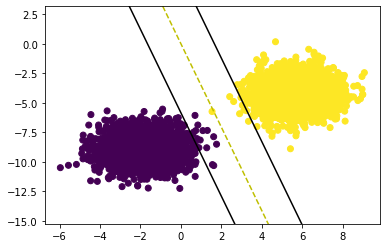

In [19]:
def visualize_svm():
     def get_hyperplane_value(x, w, offset):
          return (-w[0] * x + offset) / w[1]

     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(X_train[:,0], X_train[:,1], marker='o',c=y_train)

     x0_1 = np.amin(X_train[:,0])
     x0_2 = np.amax(X_train[:,0])

     x1_1 = get_hyperplane_value(x0_1, w,  0)
     x1_2 = get_hyperplane_value(x0_2, w,  0)

     x1_1_m = get_hyperplane_value(x0_1,w, -1)
     x1_2_m = get_hyperplane_value(x0_2,w, -1)

     x1_1_p = get_hyperplane_value(x0_1,w,  1)
     x1_2_p = get_hyperplane_value(x0_2,w, 1)

     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

     x1_min = np.amin(X_train[:,1])
     x1_max = np.amax(X_train[:,1])
     ax.set_ylim([x1_min-3,x1_max+3])

     plt.show()

visualize_svm()